In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.pipeline import Pipeline

In [28]:
df=pd.read_csv("wine.csv")

In [4]:
#TASK 1:EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


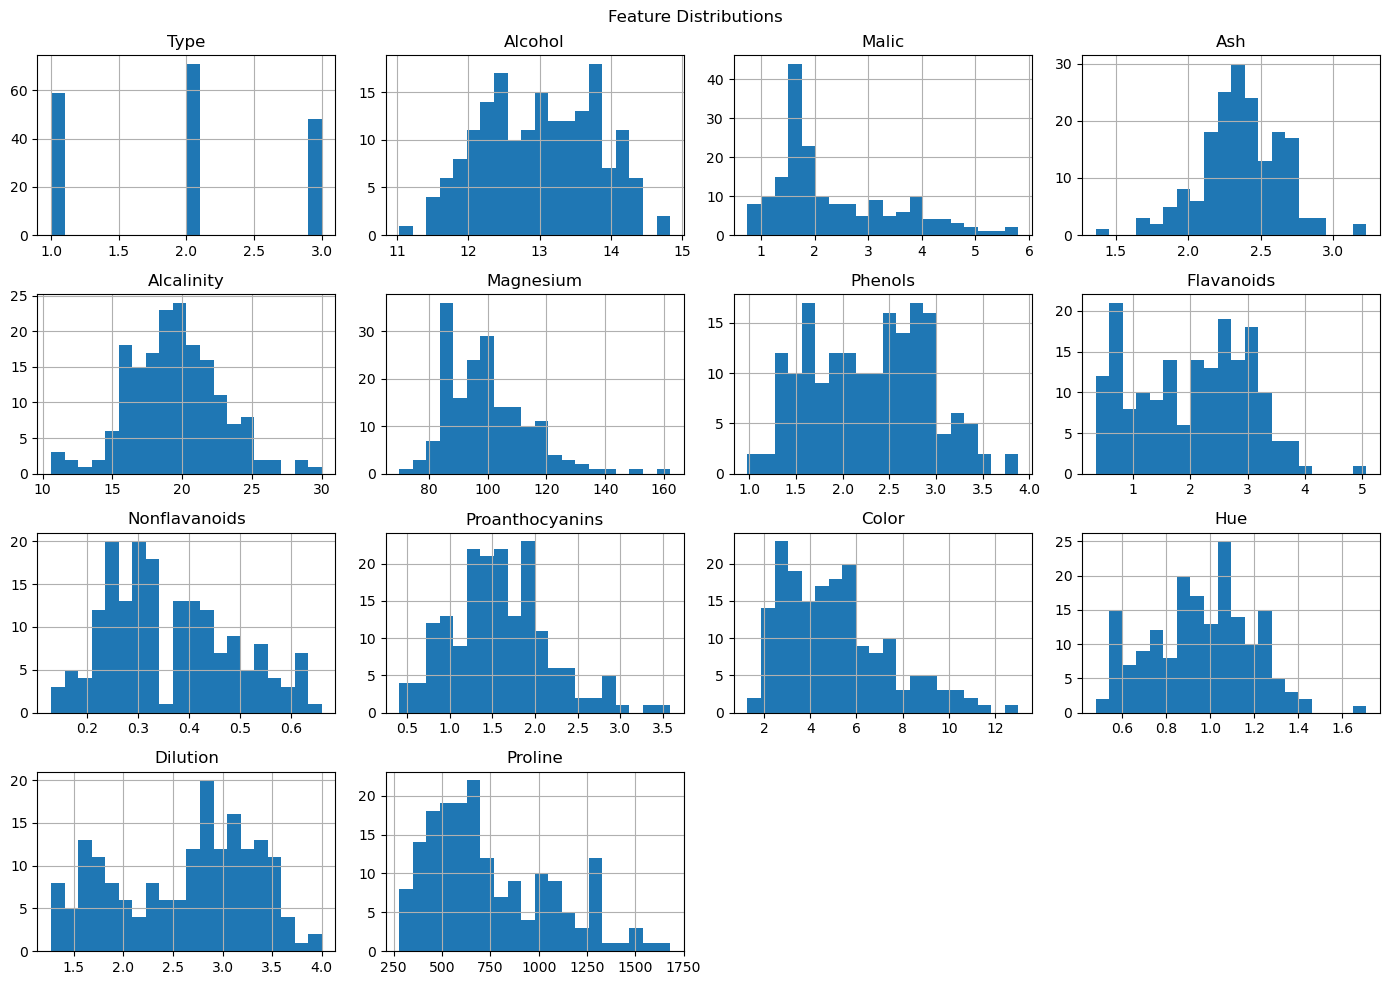

In [29]:
# Histograms
df.hist(bins=20,figsize=(14,10))
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

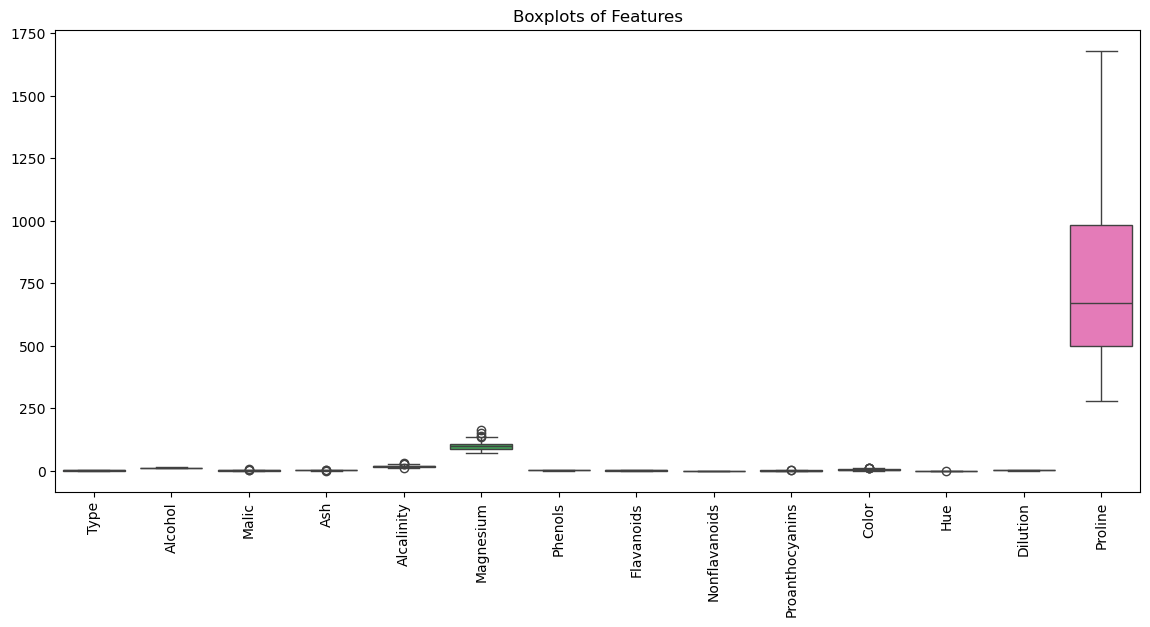

In [30]:
# Boxplots
plt.figure(figsize=(14,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplots of Features")
plt.show()

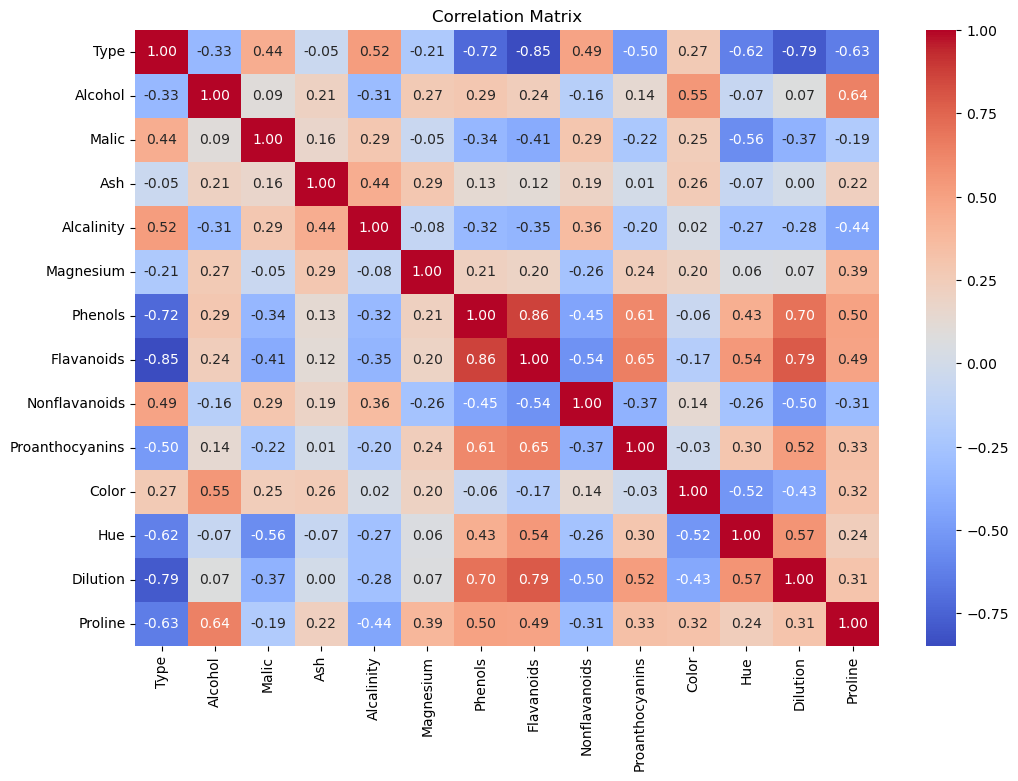

In [31]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [32]:
# TASK 2: PCA
# Standardize
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)

In [33]:
# PCA
pca=PCA()
pca_data=pca.fit_transform(scaled_data)

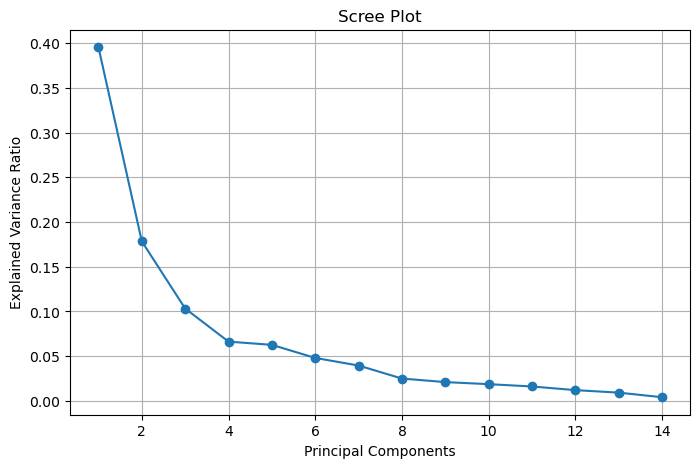

In [34]:
# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.grid()
plt.show()

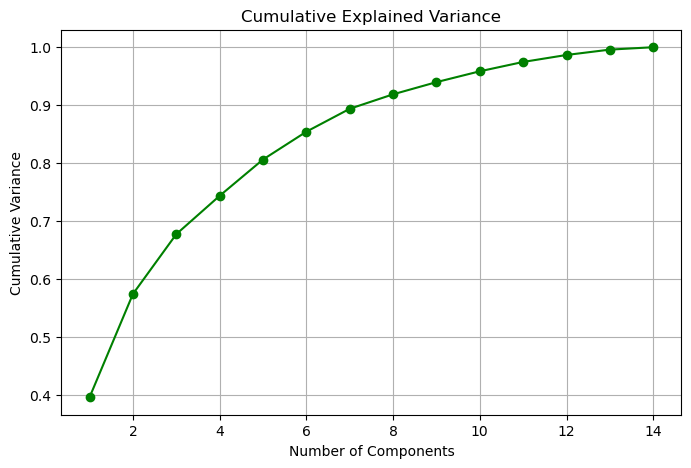

In [35]:
# Cumulative Explained Variance
plt.figure(figsize=(8,5))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_.cumsum(),marker='o',color='green')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid()
plt.show()

In [36]:
# Keep first N components
pca_final=PCA(n_components=2)
pca_result=pca_final.fit_transform(scaled_data)

C:\Users\pujitha tummala\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pujitha tummala\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pujitha tummala\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pujitha tummala\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans 

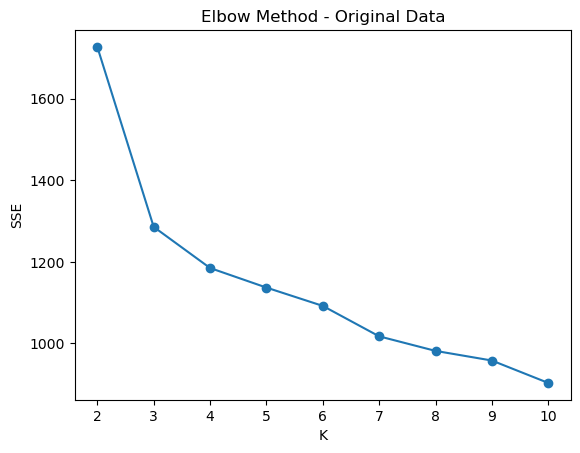

In [37]:
# TASK 3: Clustering on Original Data
# Elbow method
sse=[]
K_range=range(2,11)
for k in K_range:
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(scaled_data)
    sse.append(km.inertia_)

plt.plot(K_range,sse,marker='o')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method - Original Data')
plt.show()

In [38]:
# KMeans Clustering with optimal K 
kmeans_orig=KMeans(n_clusters=3,random_state=42)
orig_clusters=kmeans_orig.fit_predict(scaled_data)

C:\Users\pujitha tummala\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
# Silhouette Score & Davies-Bouldin Index
print("Silhouette Score (Original):",silhouette_score(scaled_data,orig_clusters))
print("Davies-Bouldin Index (Original):",davies_bouldin_score(scaled_data,orig_clusters))

Silhouette Score (Original): 0.30648398324833453
Davies-Bouldin Index (Original): 1.315707552261773


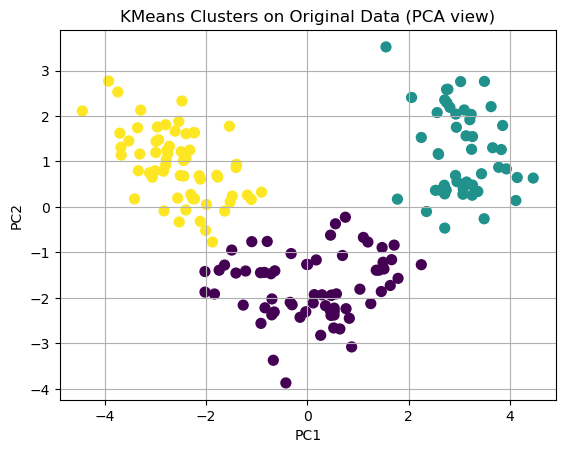

In [40]:
# Visualize clusters in PCA space
plt.scatter(pca_result[:, 0],pca_result[:, 1],c=orig_clusters,cmap='viridis',s=50)
plt.title("KMeans Clusters on Original Data (PCA view)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

In [41]:
# TASK 4: Clustering on PCA Data
kmeans_pca=KMeans(n_clusters=3,random_state=42)
pca_clusters=kmeans_pca.fit_predict(pca_result)

C:\Users\pujitha tummala\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [42]:
# Evaluation
print("Silhouette Score (PCA Data):",silhouette_score(pca_result,pca_clusters))
print("Davies-Bouldin Index (PCA Data):",davies_bouldin_score(pca_result,pca_clusters))

Silhouette Score (PCA Data): 0.6024415520362845
Davies-Bouldin Index (PCA Data): 0.5397078562575711


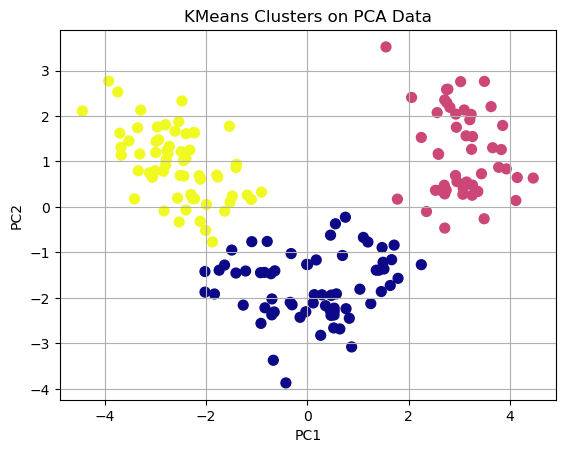

In [43]:
# Visualize
plt.scatter(pca_result[:,0],pca_result[:, 1],c=pca_clusters,cmap='plasma',s=50)
plt.title("KMeans Clusters on PCA Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

In [44]:
# TASK 5: Comparison 
print("Original Silhouette Score:",silhouette_score(scaled_data,orig_clusters))
print("PCA Silhouette Score:",silhouette_score(pca_result,pca_clusters))
print("Original Davies-Bouldin Index:",davies_bouldin_score(scaled_data,orig_clusters))
print("PCA Davies-Bouldin Index:",davies_bouldin_score(pca_result,pca_clusters))

Original Silhouette Score: 0.30648398324833453
PCA Silhouette Score: 0.6024415520362845
Original Davies-Bouldin Index: 1.315707552261773
PCA Davies-Bouldin Index: 0.5397078562575711


In [45]:
# TASK 6: Conclusion 
print("PCA reduces dimensionality and may slightly improve or maintain clustering performance.")
print("Useful when dealing with high-dimensional data to simplify visualization and reduce noise.")

PCA reduces dimensionality and may slightly improve or maintain clustering performance.
Useful when dealing with high-dimensional data to simplify visualization and reduce noise.
